In [52]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import seaborn as sns
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [12]:
df = pd.read_csv('./fake_job_data.csv')
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [13]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [14]:
df.tail()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


In [15]:
df.shape

(17880, 18)

In [16]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df.isnull().sum() #using to check null values in dataset.

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [18]:
df = df.drop(["job_id","telecommuting","has_company_logo","has_questions","salary_range","employment_type"],axis=1)

In [19]:
df.head()


,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [20]:
df.fillna("",inplace=True)

In [21]:
df.isnull().sum()


title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

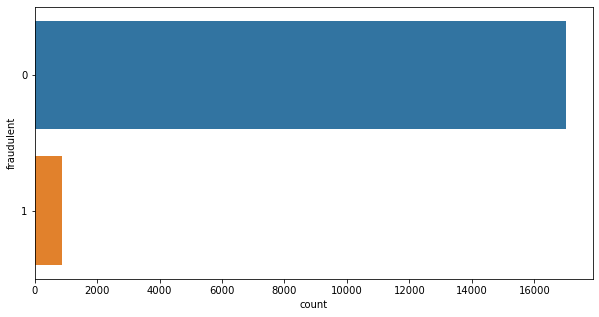

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(y='fraudulent',data=df)
plt.show()

In [23]:
df.groupby('fraudulent')['fraudulent'].count()

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

In [24]:
exp = dict(df.required_experience.value_counts())
exp
del exp['']
exp

{'Mid-Senior level': 3809,
 'Entry level': 2697,
 'Associate': 2297,
 'Not Applicable': 1116,
 'Director': 389,
 'Internship': 381,
 'Executive': 141}

<BarContainer object of 7 artists>

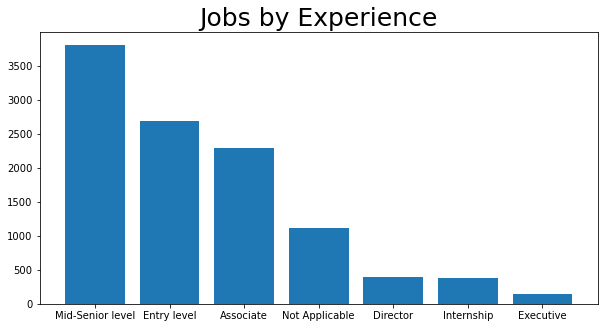

In [25]:
plt.figure(figsize=(10,5))
plt.title("Jobs by Experience",size=25)
plt.bar(exp.keys(),exp.values())

In [26]:
df

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,Mid-Senior level,,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,,,,,0
17878,Graphic Designer,"NG, LA, Lagos",,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,Not Applicable,Professional,Graphic Design,Design,0


In [27]:
def split(location):
    loc = location.split(',')
    return loc[0];
df['country'] = df.location.apply(split)

In [28]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [29]:
country = dict(df.country.value_counts()[:10])
del country[''] #Deleting Blank value countries from dictionaries
country

{'US': 10656,
 'GB': 2384,
 'GR': 940,
 'CA': 457,
 'DE': 383,
 'NZ': 333,
 'IN': 276,
 'AU': 214,
 'PH': 132}

Text(0.5, 1.0, 'Country-wise Job Postings')

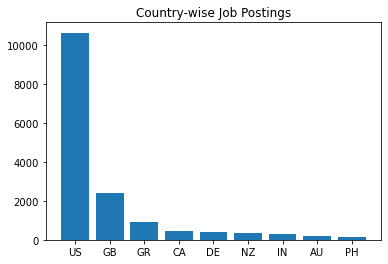

In [30]:
plt.bar(country.keys(),country.values())
plt.title("Country-wise Job Postings")

In [31]:
edu = dict(df.required_education.value_counts()[:6])
del edu[''] #Deleting Blank value edu from dictionaries
edu

{"Bachelor's Degree": 5145,
 'High School or equivalent': 2080,
 'Unspecified': 1397,
 "Master's Degree": 416,
 'Associate Degree': 274}

Text(0, 0.5, 'Jobs')

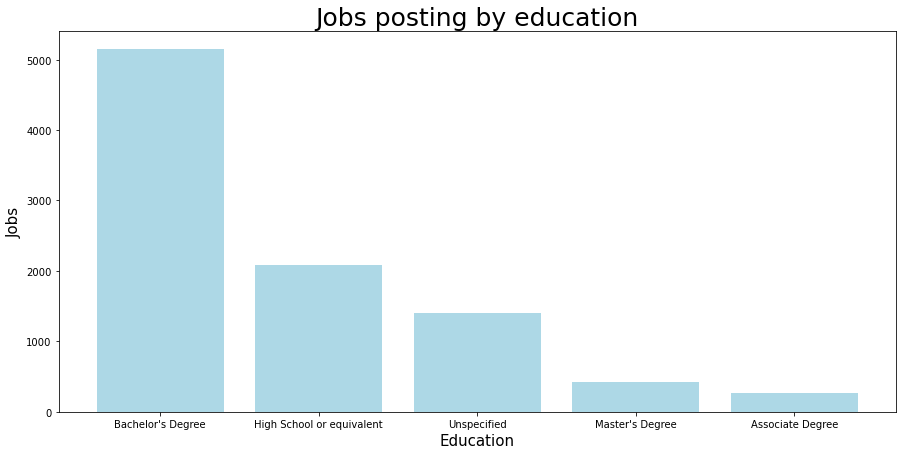

In [32]:
plt.figure(figsize=(15,7))
plt.title('Jobs posting by education',size=25)
plt.bar(edu.keys(),edu.values(),color="lightblue")
plt.xlabel("Education",size=15)
plt.ylabel('Jobs',size=15)

In [33]:
print(df[df.fraudulent==0].title.value_counts()[:20]) #Genuine jobs postings comes usually with this titles

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Beauty & Fragrance consultants needed                  60
Graduates: English Teacher Abroad                      57
Product Manager                                        47
Marketing Manager                                      45
Web Designer                                           44
Office Manager                                         44
Customer Service Associate                             44
Senior Softwar

In [34]:
print(df[df.fraudulent==1].title.value_counts()[:20]) #Fraudulent jobs postings comes usually with this titles

Cruise Staff Wanted *URGENT*                                            21
Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Network Marketing                                                       10
Payroll Clerk                                                           10
Account Sales Managers $80-$130,000/yr                                  10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Agency Sales Managers $150-$175,000/yr                                   9
Data Entry                                                               9
 Payroll Data Entry Clerk Position - Earn $100-$200 Daily                6
Call Center Representativ

In [35]:
df['text'] = df['title']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']

In [36]:

df2 = df.copy()

In [37]:
del df['title']
del df['location']
del df['department']
del df["company_profile"]
del df["description"]
del df["requirements"]
del df["benefits"]
del df["required_experience"]
del df["required_education"]
del df["industry"]
del df["function"]
del df["country"]

In [38]:
df.head()

,fraudulent,text
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


In [39]:
df.tail()

,fraudulent,text
17875,0,Account Director - Distribution Vend is looki...
17876,0,Payroll Accountant WebLinc is the e-commerce p...
17877,0,Project Cost Control Staff Engineer - Cost Con...
17878,0,Graphic Designer Nemsia Studios is looking fo...
17879,0,Web Application Developers Vend is looking for...


In [40]:
df.shape

(17880, 2)

In [41]:
fraudjobs_text = df[df.fraudulent == 1].text # 1 for fraud jobs
realjobs_text = df[df.fraudulent == 0].text # 0 for real jobs

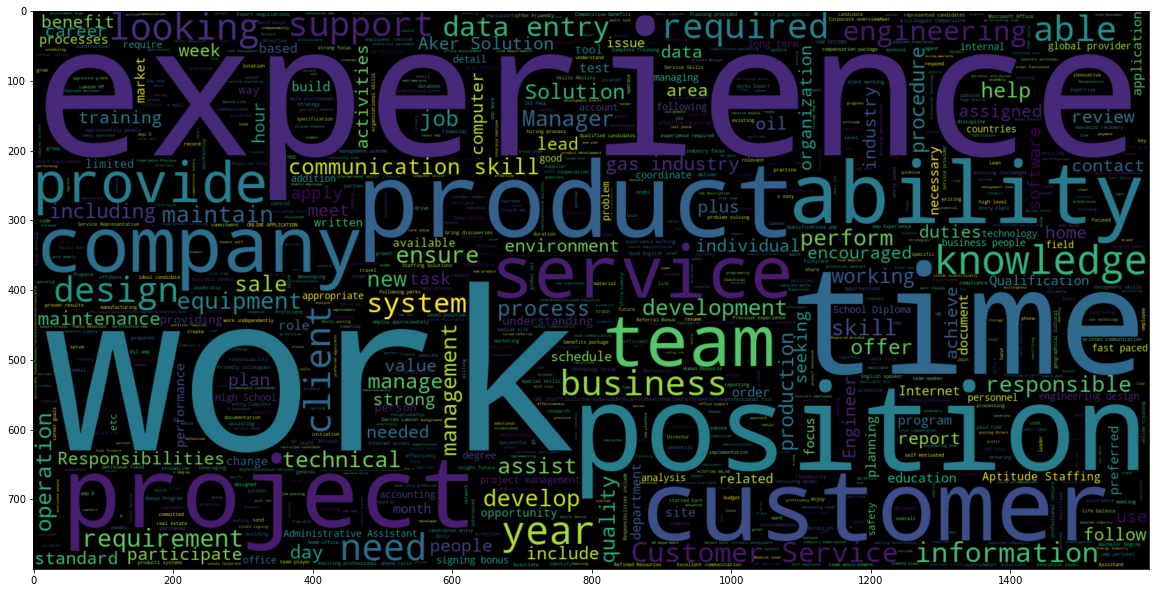

In [42]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(20,15))
wc = WordCloud(min_font_size = 3,max_words = 2000, width = 1600, height = 800, stopwords=STOPWORDS).generate(str("".join(fraudjobs_text)))
plt.imshow(wc,interpolation = "bilinear")  #fraud jobs keywords 

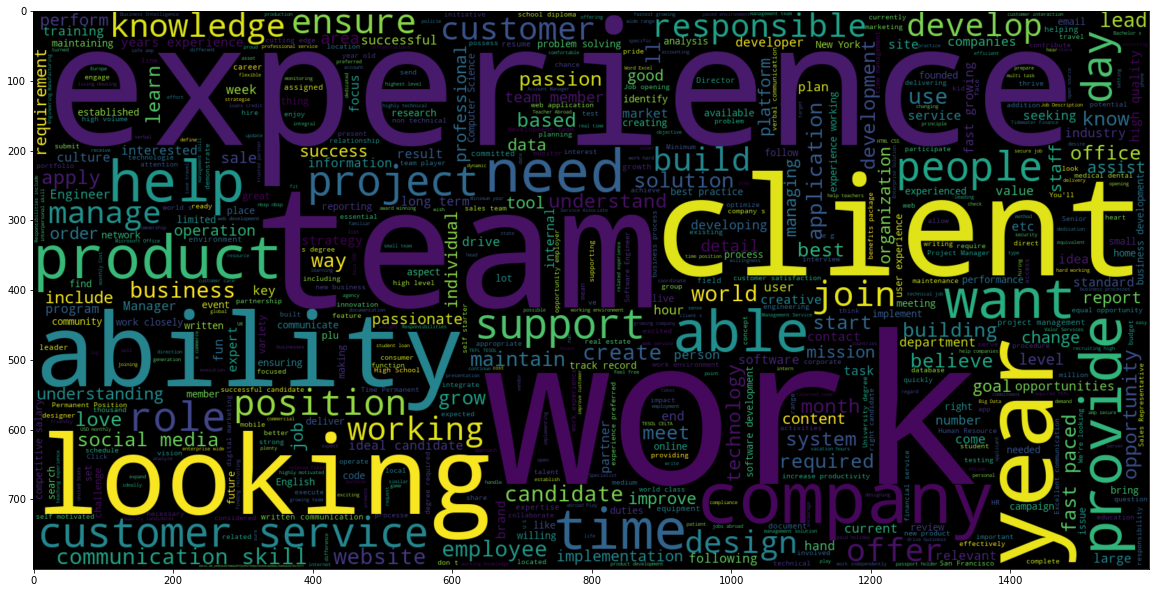

In [43]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(20,15))
wc = WordCloud(min_font_size = 3,max_words = 2000, width = 1600, height = 800, stopwords=STOPWORDS).generate(str("".join(realjobs_text)))
plt.imshow(wc,interpolation = "bilinear")  #real job keywords

In [44]:
!pip install spacy && python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.9 MB 23.1 MB/s            
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [53]:
punctuations = string.punctuation

nlp  = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

parser  = English()

def spacy_tokenizer(sentence):
    mytoken = parser(sentence)
    mytokens = [word.lemma.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens]
    mytokens = [word for word in mytokens if word not in stop_words and word not in punctuations]
    return mytokens

class predictors(TransformerMixin):
    def transform(self,X,**transform_params):
        return [clean_text(text) for text in X]
    
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self,deep = True):
        return {}
    
def clean_text(text):
    return text.strip().lower()


In [54]:
df['text'] = df['text'].apply(clean_text)

In [58]:
cv = TfidfVectorizer(max_features=100)
x = cv.fit_transform(df['text'])
df1 = pd.DataFrame(x.toarray(),columns = cv.get_feature_names())
df.drop(["text"],axis=1,inplace=True)
main_df = pd.concat([df1,df],axis=1)

In [59]:
main_df.head()

,ability,about,all,also,amp,an,and,are,as,at,...,who,will,with,work,working,world,years,you,your,fraudulent
0,0.000000,0.041120,0.000000,0.042424,0.036488,0.000000,0.755238,0.000000,0.078653,0.000000,...,0.000000,0.000000,0.186067,0.051026,0.068029,0.000000,0.000000,0.000000,0.000000,0
1,0.021895,0.094183,0.035394,0.024292,0.041787,0.029771,0.490896,0.056626,0.060050,0.052431,...,0.000000,0.078004,0.165735,0.043827,0.116862,0.099327,0.000000,0.204854,0.130452,0
2,0.000000,0.000000,0.176807,0.000000,0.041749,0.089231,0.397029,0.113149,0.000000,0.000000,...,0.000000,0.062346,0.307512,0.058383,0.000000,0.000000,0.000000,0.094462,0.074476,0
3,0.023267,0.000000,0.018806,0.000000,0.000000,0.094909,0.695542,0.000000,0.031906,0.037144,...,0.023132,0.049735,0.075480,0.046573,0.000000,0.105551,0.019806,0.050236,0.059411,0
4,0.000000,0.000000,0.068009,0.000000,0.040147,0.028602,0.606379,0.081605,0.115386,0.000000,...,0.000000,0.000000,0.159230,0.028071,0.037425,0.000000,0.035814,0.030279,0.107427,0


In [72]:
Y = main_df.iloc[:,-1]
X = main_df.iloc[:,:-1]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14304, 100)
(3576, 100)
(14304,)
(3576,)


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm

In [86]:
lg_model = LogisticRegression(random_state=0).fit(x_train,y_train)
dtc_model = DecisionTreeClassifier(random_state=0).fit(x_train,y_train)
rfc_model = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy").fit(x_train,y_train)
svm_model = svm.SVC().fit(x_train,y_train)
knn_model = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)

In [88]:
lg_pred  = lg_model.predict(x_test)
dtc_pred = dtc_model.predict(x_test)
rfc_pred = rfc_model.predict(x_test)
svm_pred = svm_model.predict(x_test)
knn_pred = knn_model.predict(x_test)

In [102]:
target_names = ["Real-0","Fake-1"]
lg_score = accuracy_score(y_test,lg_pred)
print("Logistic Regression Accuracy: " , lg_score*100)
print("Confusion Matrix: " ,confusion_matrix(y_test,lg_pred)) # For Logistic Regression Confusion Matrix
print(classification_report(y_test, lg_pred,target_names = target_names))

Logistic Regression Accracy:  95.63758389261746
[[3392   10]
 [ 146   28]]
              precision    recall  f1-score   support

      Real-0       0.96      1.00      0.98      3402
      Fake-1       0.74      0.16      0.26       174

    accuracy                           0.96      3576
   macro avg       0.85      0.58      0.62      3576
weighted avg       0.95      0.96      0.94      3576



In [106]:
target_names = ["Real-0","Fake-1"]
dtc_score = accuracy_score(y_test,dtc_pred)
print("Decision Tree Accuracy: " , dtc_score*100)
print("Confusion Matrix: " ,confusion_matrix(y_test,dtc_pred)) # For Decision Tree Confusion Matrix
print(classification_report(y_test, dtc_pred,target_names = target_names))

Decision Tree Accracy:  94.57494407158836
Confusion Matrix:  [[3297  105]
 [  89   85]]
              precision    recall  f1-score   support

      Real-0       0.97      0.97      0.97      3402
      Fake-1       0.45      0.49      0.47       174

    accuracy                           0.95      3576
   macro avg       0.71      0.73      0.72      3576
weighted avg       0.95      0.95      0.95      3576



In [107]:
target_names = ["Real-0","Fake-1"]
rfc_score = accuracy_score(y_test,rfc_pred)
print("Random Forest Classifier Accuracy: " , rfc_score*100)
print("Confusion Matrix: " ,confusion_matrix(y_test,rfc_pred)) # For Random Forest Classifier Confusion Matrix
print(classification_report(y_test, rfc_pred,target_names = target_names))

Random Forest Classifier Accracy:  96.89597315436241
Confusion Matrix:  [[3400    2]
 [ 109   65]]
              precision    recall  f1-score   support

      Real-0       0.97      1.00      0.98      3402
      Fake-1       0.97      0.37      0.54       174

    accuracy                           0.97      3576
   macro avg       0.97      0.69      0.76      3576
weighted avg       0.97      0.97      0.96      3576



In [108]:
target_names = ["Real-0","Fake-1"]
svm_score = accuracy_score(y_test,svm_pred)
print("Support Vector Machines (SVM) Accuracy: " , svm_score*100)
print("Confusion Matrix: " ,confusion_matrix(y_test,svm_pred)) # For Support Vector Machines Confusion Matrix
print(classification_report(y_test, svm_pred,target_names = target_names))

Support Vector Machines (SVM) Accracy:  96.67225950782998
Confusion Matrix:  [[3400    2]
 [ 117   57]]
              precision    recall  f1-score   support

      Real-0       0.97      1.00      0.98      3402
      Fake-1       0.97      0.33      0.49       174

    accuracy                           0.97      3576
   macro avg       0.97      0.66      0.74      3576
weighted avg       0.97      0.97      0.96      3576



In [109]:
target_names = ["Real-0","Fake-1"]
knn_score = accuracy_score(y_test,knn_pred)
print("K-Nearest Neighbor (KNN) Accuracy: " , knn_score*100)
print("Confusion Matrix: " ,confusion_matrix(y_test,knn_pred)) # For K-Nearest Neighbor (KNN) Confusion Matrix
print(classification_report(y_test, knn_pred,target_names = target_names))

K-Nearest Neighbor (KNN) Accuracy:  97.42729306487695
Confusion Matrix:  [[3392   10]
 [  82   92]]
              precision    recall  f1-score   support

      Real-0       0.98      1.00      0.99      3402
      Fake-1       0.90      0.53      0.67       174

    accuracy                           0.97      3576
   macro avg       0.94      0.76      0.83      3576
weighted avg       0.97      0.97      0.97      3576



In [110]:
print("Logistic Regression Accracy: " , lg_score*100)
print("Decision Tree Accracy: " , dtc_score*100)
print("Random Forest Accracy: " , rfc_score*100)
print("Support Vector Machines (SVM) Accracy: " , svm_score*100)
print("KNN Accracy: " , knn_score*100) 

Logistic Regression Accracy:  95.63758389261746
Decision Tree Accracy:  94.57494407158836
Random Forest Accracy:  96.89597315436241
Support Vector Machines (SVM) Accracy:  96.67225950782998
KNN Accracy:  97.42729306487695


### KNN Algorithm gives us Higher Prediction which is almost 97.42% 

#### So, model train by KNN Algorithm is the best model for this dataset.